In [97]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split

In [98]:
fifa_train = pd.read_csv(r"C:\Users\haiss\Downloads\FIFA_TRAIN_DATA.CSV", sep = '?')
fifa_train

cols = []
for i in range(len(fifa_train.columns)): 
    cols.append(fifa_train.columns[i].lower().replace(' ', '_')) 
fifa_train.columns = cols

fifa_train


,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,.

In [99]:
pd.set_option('display.max_columns', None)
fifa_train.head()

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male


In [100]:
numeric_data = fifa_train.select_dtypes(include=[np.number])
numeric_data

,unnamed:_0,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,1,16,37,71,70,71,0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
1,2,27,33,71,71,71,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
2,4,41,36,81,82,81,0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
3,6,80,38,77,77,77,0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,44,71,83,77,62,66
4,7,241,39,78,78,78,0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,60,72,85,77,41,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,17117,259083,18,58,61,77,19,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,52,85.0,242,47,62.0,51,45,37,219,45,25.0,47.0,57.0,45,55.0,119,42,38,39.0,56,12,9,12,10,13,1498,323,75,44,55,65,37,47
13696,17118,259084,19,54,56,68,14,223,30,55,52,43,43.0,199,50,38.0,30,29,52,303,66,67,62.0,50,58.0,290,53,67.0,57,65,48,221,46,22.0,53.0,45.0,55,50.0,65,24,19,22.0,50,7,11,6,12,14,1351,294,67,53,38,52,25,59
13697,17119,259085,19,60,60,72,12,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,60,61,60,65,24,59
13698,17121,259090,18,56,58,66,10,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55


In [101]:
correlation_matrix = numeric_data.corr()
high_correlation = correlation_matrix[correlation_matrix > 0.8]
high_correlation = high_correlation.dropna(how='all', axis=1).dropna(how='all', axis=0)
(high_correlation)

,unnamed:_0,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
unnamed:_0,1.000000,0.831183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,0.831183,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ova,NaN,NaN,NaN,1.000000,0.985851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832967,NaN,NaN,NaN,NaN,NaN,NaN
bov,NaN,NaN,NaN,0.985851,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830719,NaN,NaN,NaN,NaN,NaN,NaN
pot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
growth,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.844010,0.877999,NaN,0.881521,0.898598,0.928672,0.914868,0.853718,NaN,NaN,0.935679,NaN,NaN,NaN,NaN,NaN,NaN,0.823073,NaN,NaN,NaN,NaN,0.889611,0.889267,NaN,NaN,0.909627,NaN,0.839852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crossing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844010,1.000000,NaN,NaN,0.800626,NaN,0.884274,0.855821,0.834639,NaN,NaN,0.835907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finishing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877999,NaN,1.000000,NaN,NaN,0.890854,NaN,0.821540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.883102,NaN,NaN,NaN,0.896496,NaN,0.838804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


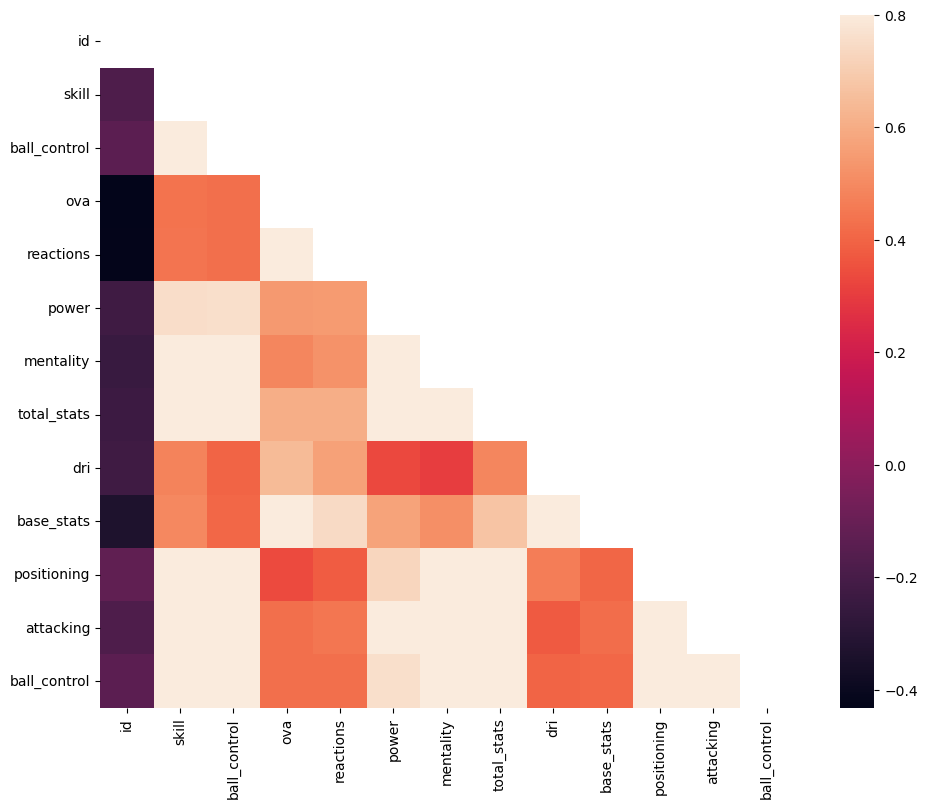

In [102]:
numeric_data=['id','skill','ball_control','ova','reactions','power','mentality','total_stats','dri','base_stats','positioning','attacking','ball_control']

corrmat = fifa_train[numeric_data].corr()
fig=plt.figure(figsize=(12,9))
mask=np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,vmax=.8,mask=mask,square=True,annot=True)
plt.show()

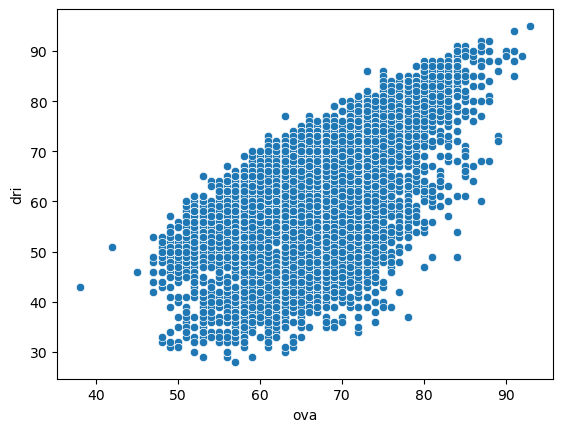

In [68]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['dri'])
plt.show()

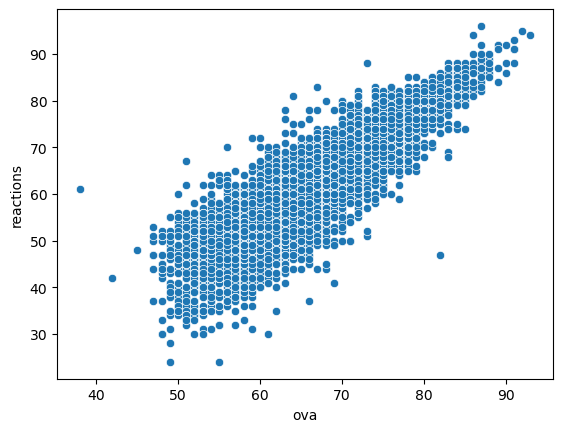

In [69]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['reactions'])
plt.show()

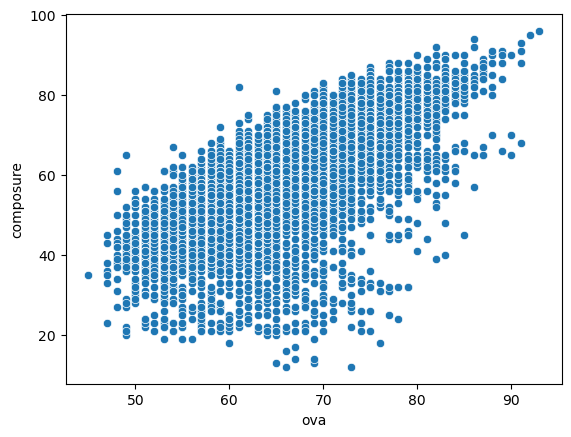

In [70]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['composure'])
plt.show()

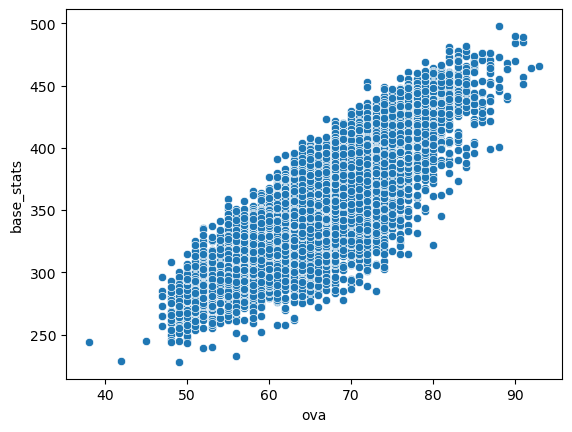

In [71]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['base_stats'])
plt.show()

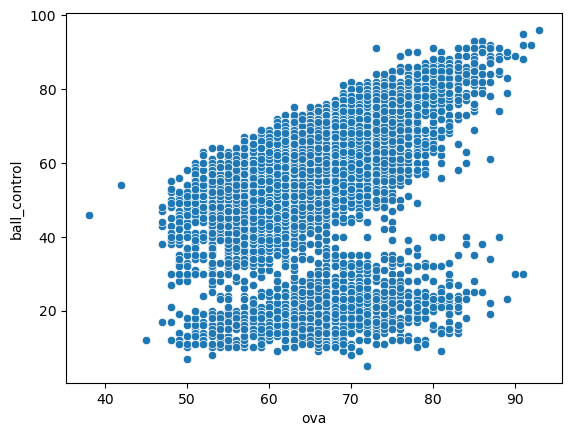

In [72]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['ball_control'])
plt.show()

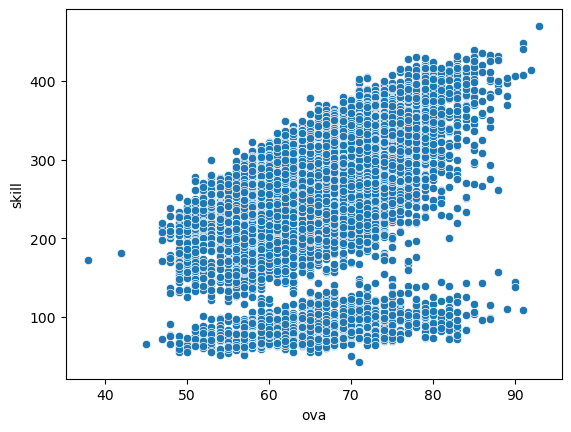

In [73]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['skill'])
plt.show()

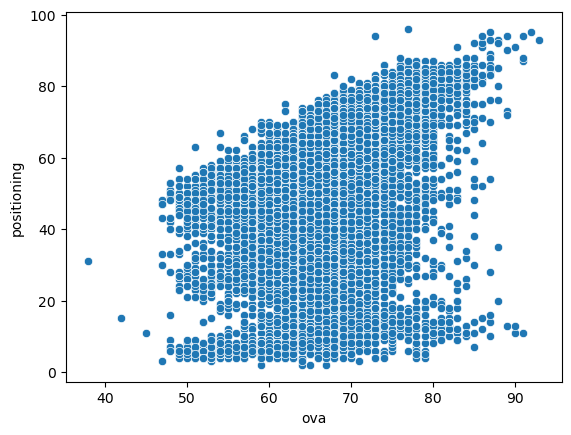

In [74]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['positioning'])
plt.show()

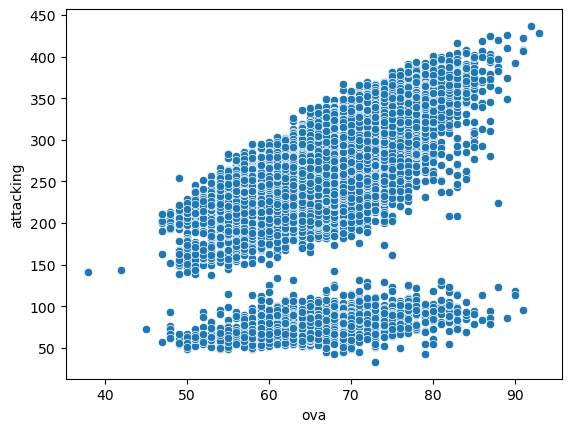

In [75]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['attacking'])
plt.show()

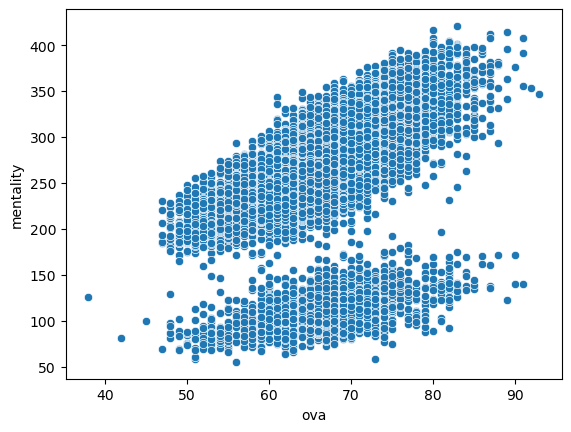

In [76]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['mentality'])
plt.show()

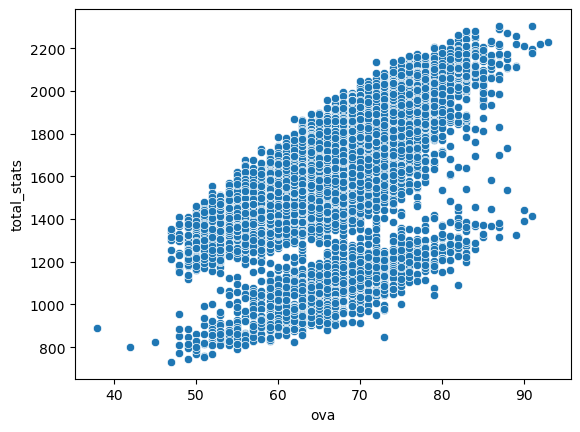

In [77]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['total_stats'])
plt.show()

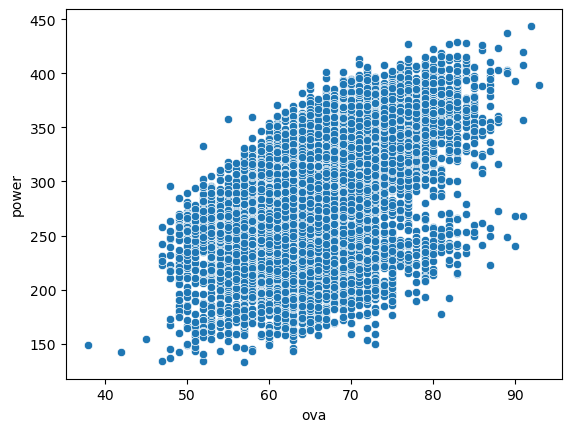

In [78]:
sns.scatterplot(x=fifa_train['ova'], y=fifa_train['power'])
plt.show()

In [79]:
bestposit = pd.get_dummies(fifa_train['bp'], prefix='best')
fifa_train = pd.concat([fifa_train, bestposit], axis=1)
fifa_train

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,best_CAM,best_CB,best_CDM,best_CF,best_CM,best_GK,best_LB,best_LM,best_LW,best_LWB,best_RB,best_RM,best_RW,best_RWB,best_ST
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.p

<Axes: xlabel='bp'>

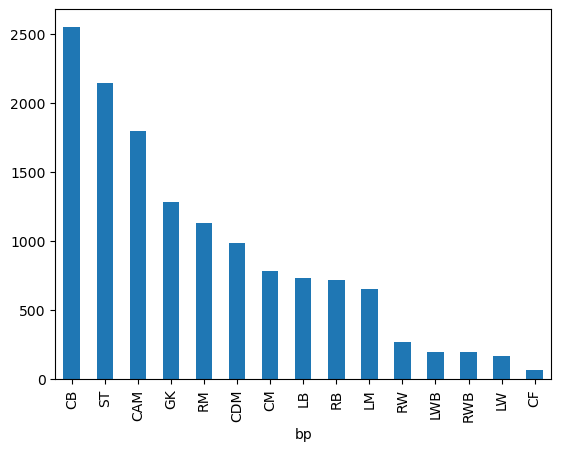

In [80]:
fifa_train['bp'].value_counts().plot(kind='bar')

In [81]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_CB']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.87
The intercept of the model is =  8.740380716135995
The coefficients of the model are =  [ 0.08768222  0.35324185 -0.01948298  0.08251236  0.09343719 -0.00592817
  0.01698631 -0.01837316  3.98319031]
The mse of the model is =  6.020486207573212
The root mse of the model is =  2.4536679089830415
The mean absolute error of the model is =  1.8983518819428564


In [82]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_ST']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.9821566924143
The coefficients of the model are =  [ 0.09699928  0.41746612 -0.02436886 -0.0760065   0.14734995 -0.00318001
  0.01392471 -0.02453672 -0.73321232]
The mse of the model is =  7.108332418814198
The root mse of the model is =  2.666145610954923
The mean absolute error of the model is =  2.0666001837035974


In [83]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_CAM']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  12.080001291480116
The coefficients of the model are =  [ 0.10179922  0.41716049 -0.0176399  -0.09275551  0.14896412 -0.00745667
  0.00872392 -0.02469572 -0.49520669]
The mse of the model is =  7.118951022935214
The root mse of the model is =  2.6681362451972377
The mean absolute error of the model is =  2.06978541450205


In [84]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_GK']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.901049720712216
The coefficients of the model are =  [ 0.09586714  0.40249415 -0.01768497 -0.15267488  0.21300985 -0.00557445
  0.01236554 -0.02023871  5.18516993]
The mse of the model is =  6.991545083586269
The root mse of the model is =  2.644152999277135
The mean absolute error of the model is =  2.0573587818172547


In [85]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_RM']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.953088694367764
The coefficients of the model are =  [ 0.10349485  0.41365927 -0.01934208 -0.09665412  0.15145277 -0.00715953
  0.00974315 -0.02505214 -0.4476443 ]
The mse of the model is =  7.127012017216967
The root mse of the model is =  2.6696464217601865
The mean absolute error of the model is =  2.0726084442833197


In [86]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_CDM']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.641670154430145
The coefficients of the model are =  [ 0.10305992  0.41439106 -0.0194258  -0.09682562  0.15356097 -0.00589749
  0.00611089 -0.02148896 -1.17390047]
The mse of the model is =  7.0592933636080595
The root mse of the model is =  2.656933074732606
The mean absolute error of the model is =  2.063816631474729


In [87]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_CM']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.70280992280398
The coefficients of the model are =  [ 0.10288495  0.41523923 -0.0177023  -0.09543532  0.14514924 -0.00679237
  0.00730019 -0.02196011 -1.54349681]
The mse of the model is =  7.023382419560573
The root mse of the model is =  2.650166489026788
The mean absolute error of the model is =  2.053430987379112


In [88]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_LB']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.901564900207873
The coefficients of the model are =  [ 0.10358813  0.41594925 -0.0196645  -0.0986638   0.15149618 -0.0072262
  0.00922399 -0.02420754 -0.33128557]
The mse of the model is =  7.135610513564405
The root mse of the model is =  2.671256354894529
The mean absolute error of the model is =  2.0712783250228832


In [89]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_RW']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.890880044374875
The coefficients of the model are =  [ 0.10309453  0.416772   -0.01970196 -0.09746259  0.15109136 -0.00682644
  0.00927218 -0.02443037  0.09670113]
The mse of the model is =  7.140812360231749
The root mse of the model is =  2.6722298479419297
The mean absolute error of the model is =  2.0727046380413245


In [90]:
Y = fifa_train['ova']
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_LWB']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The intercept of the model is =  11.85888363696806
The coefficients of the model are =  [ 0.10349853  0.41579127 -0.0196288  -0.0980822   0.15198794 -0.00692372
  0.00909471 -0.02442425 -0.73997726]
The mse of the model is =  7.133263025126209
The root mse of the model is =  2.670816920930038
The mean absolute error of the model is =  2.071567315358368


In [91]:
fifadf = pd.read_csv(r"C:\Users\haiss\Downloads\FIFA_TEST_DATA.CSV", sep = '?')
fifadf

cols = []
for i in range(len(fifadf.columns)): 
    cols.append(fifadf.columns[i].lower().replace(' ', '_')) 
fifadf.columns = cols
fifadf

bestposit = pd.get_dummies(fifadf['bp'], prefix='best')
fifadf = pd.concat([fifadf, bestposit], axis=1)
fifadf

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,best_CAM,best_CB,best_CDM,best_CF,best_CM,best_GK,best_LB,best_LM,best_LW,best_LWB,best_RB,best_RM,best_RW,best_RWB,best_ST
0,15195,252942,G. Borrelli,19,Italy,Pescara,ST,ST,https://cdn.sofifa.com/players/252/942/20_120.png,https://cdn.sofifa.com/teams/200/light_60.png,https://cdn.sofifa.com/flags/it.png,Pescara 2019 ~ 2024,"6'4""",198lbs,Right,15,"Jul 12, 2019",NaN,€325K,€600,€707K,2019 ~ 2024,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,48,227,44,21.0,66.0,41.0,55,45.0,53,18,20,15.0,54,12,14,7,7,14,1307,284,2 ★,2★,Medium,Low,1 ★,52,57,36,52,24,63,4,58+2,58+2,58+2,50+0,54+0,54+0,54+0,50+0,50+2,50+2,50+2,48+2,44+2,44+2,44+2,48+2,34+2,35+2,35+2,35+2,34+2,34+2,38+2,38+2,38+2,34+2,16+2,Male,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,14193,248174,N. Boujellab,21,Morocco,FC Schalke 04,CAM,CAM CM CDM,https://cdn.sofifa.com/players/248/174/20_120.png,https://cdn.sofifa.com/teams/34/light_60.png,https://cdn.sofifa.com/flags/ma.png,FC Schalke 04 2018 ~ 2022,"6'0""",159lbs,Right,12,"Jul 1, 2018",NaN,€975K,€5K,€1.9M,2018 ~ 2022,274,50,58,49,65,52.0,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,52.0,59,47,51,272,58,38.0,56.0,61.0,59,58.0,160,55,54,51.0,54,15,15,7,10,7,1693,359,4 ★,3★,Medium,Medium,1 ★,69,56,59,73,50,52,33,60+2,60+2,60+2,64+0,64+0,64+0,64+0,64+0,65+2,65+2,65+2,64+2,61+2,61+2,61+2,64+2,57+2,56+2,56+2,56+2,57+2,56+2,53+2,53+2,53+2,56+2,17+2,Male,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,16722,257995,A. Wahab Ibrahim,21,Ghana,Famalicão,LB,LB,https://cdn.sofifa.com/players/257/995/20_120.png,https://cdn.sofifa.com/teams/112809/light_60.png,https://cdn.sofifa.com/flags/gh.png,Famalicão 2020 ~ 2023,"5'11""",159lbs,Left,8,"Aug 10, 2020",NaN,€400K,€1K,€920K,2020 ~ 2023,246,60,32,54,59,41.0,247,58,37.0,41,52,59,326,69,76,62.0,56,63.0,256,40,56.0,61,69,30,251,53,57.0,51.0,49.0,41,52.0,176,55,60,61.0,42,7,14,9,5,7,1544,341,2 ★,2★,Medium,Medium,1 ★,73,35,54,59,57,63,4,51+2,51+2,51+2,55+0,53+0,53+0,53+0,55+0,54+2,54+2,54+2,57+2,54+2,54+2,54+2,57+2,60+2,57+2,57+2,57+2,60+2,60+2,59+2,59+2,59+2,60+2,14+2,Male,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,8037,226077,A. Gabr,29,Egypt,Egypt,CB,CB,https://cdn.sofifa.com/players/226/077/19_120.png,https://cdn.sofifa.com/teams/111130/light_60.png,https://cdn.sofifa.com/flags/eg.png,Egypt Free,"6'3""",194lbs,Right,0,"Jul 14, 2014",NaN,€0,€0,€0,Free,214,34,25,63,59,33.0,208,42,34.0,22,66,44,305,65,62,63.0,55,60.0,308,56,66.0,66,78,42,211,67,63.0,22.0,35.0,24,65.0,218,72,71,75.0,50,14,7,14,8,7,1514,332,2 ★,2★,Medium,Medium,1 ★,63,35,47,46,69,72,4,45+1,45+1,45+1,44+0,43+0,43+0,43+0,44+0,45+1,45+1,45+1,46+1,51+1,51+1,51+1,46+1,59+1,63+1,63+1,63+1,59+1,62+1,67+1,67+1,67+1,62+1,14+1,Male,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6350,216054,N. Domínguez,30,Argentina,Racing Club,CDM,CB CDM,https://cdn.sofifa.com/players/216/054/20_120.png,https://cdn.sofifa.com/teams/101085/light_60.png,https://cdn.sofifa.com/flags/ar.png,Racing Club 2019 ~ 2021,"6'0""",157lbs,Right,0,"Jan 21, 2019",NaN,€6M,€17K

In [92]:
X = fifa_train[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_CB']]
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(fifadf[['base_stats', 'reactions','skill','dri','ball_control','power','attacking','mentality','best_CB']])
fifadf['pred_ova'] = predictions
fifadf.sort_values(by = 'pred_ova', ascending = False)

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,best_CAM,best_CB,best_CDM,best_CF,best_CM,best_GK,best_LB,best_LM,best_LW,best_LWB,best_RB,best_RM,best_RW,best_RWB,best_ST,pred_ova
1912,5030,208722,S. Mané,28,Senegal,Liverpool,LW,LW,https://cdn.sofifa.com/players/208/722/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/sn.png,Liverpool 2016 ~ 2023,"5'9""",152lbs,Right,0,"Jul 1, 2016",NaN,€78M,€250K,€144.3M,2016 ~ 2023,410,76,90,84,85,75.0,391,91,76.0,64,71,89,460,95,93,93.0,93,86.0,406,84,86.0,88,70,78,358,75,35.0,92.0,85.0,71,84.0,122,42,42,38.0,56,10,10,15,7,14,2203,469,4 ★,4★,High,Medium,3 ★,94,85,80,90,44,76,374,88+2,88+2,88+2,89+0,89+0,89+0,89+0,89+0,88+2,88+2,88+2,88+2,81+3,81+3,81+3,88+2,69+3,65+3,65+3,65+3,69+3,66+3,59+3,59+3,59+3,66+3,20+3,Male,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,88.818969
158,9331,231747,K. Mbappé,21,France,Paris Saint-Germain,ST,ST LW RW,https://cdn.sofifa.com/players/231/747/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/fr.png,Paris Saint-Germain 2018 ~ 2022,"5'10""",161lbs,Right,5,"Jul 1, 2018",NaN,€105.5M,€160K,€203.1M,2018 ~ 2022,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,79,341,62,38.0,91.0,80.0,70,84.0,100,34,34,32.0,42,13,5,7,11,6,2147,466,4 ★,5★,High,Low,3 ★,96,86,78,91,39,76,1.2K,88+3,88+3,88+3,89+0,89+0,89+0,89+0,89+0,87+3,87+3,87+3,87+3,79+3,79+3,79+3,87+3,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,Male,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,88.610409
992,1010,167495,M. Neuer,34,Germany,FC Bayern München,GK,GK,https://cdn.sofifa.com/players/167/495/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/de.png,FC Bayern München 2011 ~ 2023,"6'4""",203lbs,Right,0,"Jul 1, 2011",NaN,€29M,€125K,€47.9M,2011 ~ 2023,119,15,13,25,55,11.0,160,30,14.0,11,59,46,286,54,60,51.0,86,35.0,284,68,77.0,43,80,16,188,29,30.0,12.0,70.0,47,70.0,38,17,10,11.0,440,87,87,91,86,89,1515,497,4 ★,1★,Medium,Medium,5 ★,87,87,91,89,57,86,222,39+3,39+3,39+3,40+0,43+0,43+0,43+0,40+0,46+3,46+3,46+3,43+3,48+3,48+3,48+3,43+3,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3,87+2,Male,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,88.105294
3365,1427,177193,B. Ronhaar,23,Netherlands,Netherlands,CF,LW,https://cdn.sofifa.com/players/177/193/09_120.png,https://cdn.sofifa.com/teams/105035/light_60.png,https://cdn.sofifa.com/flags/nl.png,111648,"5'11""",163lbs,Left,3,NaN,NaN,€0,€0,€0,111648,295,87,74,48,86,NaN,330,89,NaN,80,75,86,283,96,91,NaN,96,NaN,268,59,NaN,85,57,67,316,54,85.0,88.0,NaN,89,NaN,44,20,24,NaN,67,7,20,75,20,20,1603,438,3 ★,1★,NaN,NaN,4 ★,93,71,83,89,37,65,4,77+0,77+0,77+0,88+0,77+0,77+0,77+0,88+0,84+0,84+0,84+0,88+0,76+0,76+0,76+0,88+0,61+0,68+0,68+0,68+0,61+0,54+0,44+0,44+0,44+0,54+0,21+0,Male,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,87.622518
494,4166,203376,V. van Dijk,28,Netherlands,Liverpool,CB,CB,https://cdn.sofifa.com/players/203/376/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/nl.png,Liverpool 201

In [93]:
fifa_train = fifadf[fifadf['pred_ova'] > 85]
print("Result dataframe:\n", fifa_train)

Result dataframe:
       unnamed:_0      id          name  age  nationality                 club  \
158         9331  231747     K. Mbappé   21       France  Paris Saint-Germain   
494         4166  203376   V. van Dijk   28  Netherlands            Liverpool   
554         6333  215914      N. Kanté   29       France              Chelsea   
603         6916  220814  L. Hernández   24       France    FC Bayern München   
992         1010  167495      M. Neuer   34      Germany    FC Bayern München   
1836        1566  178603    M. Hummels   31      Germany    Borussia Dortmund   
1912        5030  208722       S. Mané   28      Senegal            Liverpool   
2347        1373  176580     L. Suárez   33      Uruguay      Atlético Madrid   
2731        8489  228702    F. de Jong   23  Netherlands         FC Barcelona   
3016        3601  199914         Allan   29       Brazil              Everton   
3230        1675  181291  G. Wijnaldum   29  Netherlands            Liverpool   
3365     